This code is to work through the concept of gradient descent in a simple regression problem.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
%matplotlib inline

In [103]:
df = pd.read_csv('gradient-descent/HouseDataset.csv')
df.columns = ['GrLivArea','SalePrice']
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [104]:
x = df.GrLivArea.values
y = df.SalePrice.values

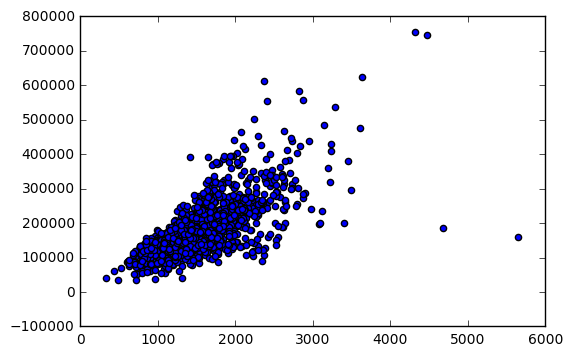

In [105]:
p = plt.scatter(x,y)

There is a linear relationship between Ground Living Area (GrLivArea). Let us describe it by the formular y = ax + b and use 'Y' to denote the estimate of 'y'.

In [106]:
#randomly initialize the initial estimate of a and b using 
# avg housprice/avg floor space as the limit for a and 
# average  price as the limit for b. 
# There's no science behind these numbers, they just seem like reasobanle arbitrary starting points


a = uniform(0,(np.mean(y)/np.mean(x)))
b = np.mean(y)

In [107]:
Y = a*x+b

In [108]:
def MSE(predictedY,actualY):
    '''    
    :param predictedY: an array of predicted y values
    :param actualY: an array of the actual y values
    :return: the mean squared error - the squared difference between actualy and predicted y
    '''
    
    error = (predictedY-actualY)
    SqError = error**2
    MeanSqError = sum(SqError)/len(actualY)
    return MeanSqError

MeanSqError =  MSE(Y,y)

The next step is to find the change in mean squared error with respect to a change in 'a', and separately 'b'.

(Y-y)**2 = (ax +b -y)**2
	= (ax +b -y)*(ax +b -y)
	= (ax)**2 +2abx -2 axy -2by +B**2 +y**2

In [110]:
dMeanSqError_da =sum(2*x*(a*x+b-y))/len(Y)
dMeanSqError_db = sum(2*(a*x-y+b))/len(Y)
print(dMeanSqError_da, dMeanSqError_db, MeanSqError)

180889270.274 141387.833605 9146882912.65


In [115]:
learning_rate = 0.001
a = a - learning_rate*dMeanSqError_da
b = b - learning_rate*dMeanSqError_db
Y = a*x+b
MeanSqError = MSE(Y,y)
print(dMeanSqError_da, dMeanSqError_db, MeanSqError)

180889270.274 141387.833605 2.10426088577e+18
